In [1]:
import numpy as np
import astropy.io.fits as fits
import fitsio
import healpy as hp
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
exp = 12 # 12 Corresponds to a resolution of 4096
res = 2**exp

In [3]:
stelFile1 = '/hdfs/bechtol/balrog/y3/y3a2_survey_conditions_maps/stellar_density/psf_stellar_density_fracdet_binned_1024_nside_4096_cel.fits.gz'
stelFile2 = '/hdfs/bechtol/balrog/y3/y3a2_survey_conditions_maps/stellar_density/psf_stellar_density_fracdet_binned_256_nside_4096_cel.fits.gz'

In [4]:
stelData = fitsio.read(stelFile2)

In [5]:
# stelData['I']

In [6]:
stelDensExt = stelData['I'].flatten()

In [7]:
# plt.figure(dpi = 150)
# plt.hist(stelDensExt, bins = np.linspace(0, 5, 1000))
# plt.yscale('log')
# #for i in np.arange(11):
# #    plt.axvline(x = i/2, color = 'k', linestyle = '--')
# plt.show()

In [8]:
stelDensExt[stelDensExt==-1.6375e+30]=hp.UNSEEN
condSigExt=hp.ud_grade(stelDensExt,res)

In [9]:
# plt.figure(dpi = 150)
# plt.hist(condSigExt, bins = np.linspace(0, 10, 100))
# plt.yscale('log')
# #for i in np.arange(11):
# #    plt.axvline(x = i/2, color = 'k', linestyle = '--')
# plt.show()

In [10]:
# starFile = '/afs/hep.wisc.edu/bechtol-group/MegansThings/balrog_detection_catalog_sof_run2_stars_v1.4_avg_added_match_flags.fits'
# # This reads in all of the data. Most of these are just flags, the only pieces that get used much outside
# # of filtering are true_ra and true_dec which get used to convert into healPixels.
# starData = fitsio.read(starFile, columns = ['detected', 'true_ra', 'true_dec',
#                                             'flags_foreground', 'flags_badregions', 'flags_footprint',
#                                             'meas_FLAGS_GOLD_SOF_ONLY', 'match_flag_1.5_asec'])

In [11]:
# # These are in degrees which is why lonlat is set to True in the next cell.
# RA = starData['true_ra']
# DEC = starData['true_dec']
# # Everything from here on out is simply used in order to filter the data
# DETECTED = starData['detected'] # This specifically is used for now to filter out any non detected injection.
# FOREGROUND = starData['flags_foreground']
# BADREGIONS = starData['flags_badregions']
# FOOTPRINT = starData['flags_footprint']
# GOLDSOF = starData['meas_FLAGS_GOLD_SOF_ONLY']
# ARCSECONDS = starData['match_flag_1.5_asec']
# # i_mag = starData['meas_cm_mag_deredden'][:,2] This gets used if we filter at all based on i magnitude.

# # This is used to filter out any injections that either weren't detected or had flags raised.
# cutIndices = np.where((FOREGROUND == 0) & 
#                       (BADREGIONS < 2) & 
#                       (FOOTPRINT == 1) & 
#                       # (GOLDSOF < 2) &
#                       (ARCSECONDS < 2))[0]

# aveEff = np.sum(DETECTED) / len(DETECTED)

# DETECTED = DETECTED[cutIndices]
# RA = RA[cutIndices]
# DEC = DEC[cutIndices]

In [12]:
# # This converts the RA and DEC values from above to healpixels so we can compare to the sky condition.
# starPixels = hp.ang2pix(res, RA, DEC, lonlat = True, nest = True)

In [13]:
# validPixels1 = np.full(12*(res**2), False, dtype = bool)
# validPixels2 = np.full(12*(res**2), False, dtype = bool)
# validPixels1[np.where(condSigExt > 0)[0]] = True
# validPixels2[starPixels] = True

# validPixels = validPixels1 & validPixels2

In [14]:
# starIndices = np.where(validPixels[starPixels])[0]

In [15]:
# # This generates the condition values and fraction detected at the valid pixels.
# condSig = condSigExt[validPixels]

# # This tells me which pixels correspond to the values above.
# condPix = np.where(validPixels)[0]

# # This tells me the pixels for the stars, it will be the same as condPix but have repeats if multiple stars are detected
# # on one pixel. By default these will not be sorted.
# starPix = starPixels[starIndices]
# DETVALIDPIX = DETECTED[starIndices]

# # This sorts the pixels. This may seem like an unnecessarily difficult way to do it but it could be useful for future projects
# # and it doesn't take much more space or time so I chose to leave it in.
# sortInds = starPix.argsort()
# starPix = starPix[sortInds[::1]]
# DET = DETVALIDPIX[sortInds[::1]]

In [16]:
# # These are indices that will be looping through the condPix and starPix arrays in parallel.
# condInd = 0
# starInd = 0

# # This will be used to store the number of stars at each pixel.
# detStar = np.zeros_like(condPix)
# injStar = np.zeros_like(condPix)

# while starInd < len(starPix):
#     if condPix[condInd] == starPix[starInd]: # If the pixels match up in the arrays.
#         detStar[condInd] += DET[starInd]
#         injStar[condInd] += 1                # Add one to the corresponding spot in the balStar array.
#         starInd += 1                         # Add one to the starInd to see if the next index in starPix is also the same.
#         # Since the last index of condPix and starPix are the same, starInd will increase the last time through the loop,
#         # making this the index that we must restrict in the while loop.
#     else:
#         condInd += 1 # If the pixels are no longer the same, increase the index you check in the condPix array.

In [17]:
# # This generates a plot of the distribution of the condition, which is useful for seeing what bin size to use.
# plt.figure(dpi = 150)
# plt.grid(zorder = 0)
# plt.hist(condSig, bins = 100, edgecolor='black', linewidth=.5, zorder = 3)
# plt.xlabel('Condition Value')
# plt.ylabel('Number of Pixels')
# plt.title('Distribution of Condition Value')
# plt.yscale('log')
# plt.show()

In [18]:
# condMin = 1
# condMax = 6
# numBins = 12

In [19]:
# xValues = np.linspace(condMin, condMax, numBins, endpoint = False) + (condMax - condMin) / (2 * numBins)

In [20]:
# # This shows what the bins will actually look like, which can be useful in seeing if any of the bins are too small.
# plt.figure(dpi = 150)
# plt.grid(zorder = 0)
# plt.hist(condSig, bins = np.linspace(condMin, condMax, numBins + 1), edgecolor='black', linewidth=.5, zorder = 3)
# plt.yscale('log')
# plt.title('Bins to Use')
# plt.xlabel('Condition Value')
# plt.ylabel('Number of Pixels')
# plt.show()

In [21]:
# def binIndicesByCondition(cond, condMin, condMax, numBins):
#     binBounds = np.linspace(condMin, condMax, (numBins + 1), endpoint = True)
#     indByBin = []
#     for i in range(len(binBounds) - 1):
#         validIndices = np.array(np.where((cond >= binBounds[i]) & (cond < binBounds[i + 1]))[0])
#         indByBin.append(validIndices)
#     return np.array(indByBin, dtype = object)

In [22]:
# binInd = binIndicesByCondition(condSig, condMin, condMax, numBins)

In [23]:
# percentBins = []

# for i in range(len(binInd)):
#     totalDet = np.sum(detStar[binInd[i]]) # Total number of detections within the bin.
#     totalInj = np.sum(injStar[binInd[i]])
#     percentBins.append(totalDet / totalInj) # Total effective area within the bin.

# relPerBins = np.array(percentBins) / aveEff # This normalizes the data, relative percent bins.
# corrValue = 1 / relPerBins

In [24]:
# # This is the final plot.
# plt.figure(dpi = 150)
# plt.plot(xValues, relPerBins, marker = '.', zorder = 3)
# plt.plot(xValues, np.ones_like(xValues), color = 'k', linestyle = '--')
# # plt.ylim([0.6, 1.3])
# plt.ylabel('Relative Percent Detected')
# plt.xlabel('Stellar Density')
# plt.grid()
# plt.show()

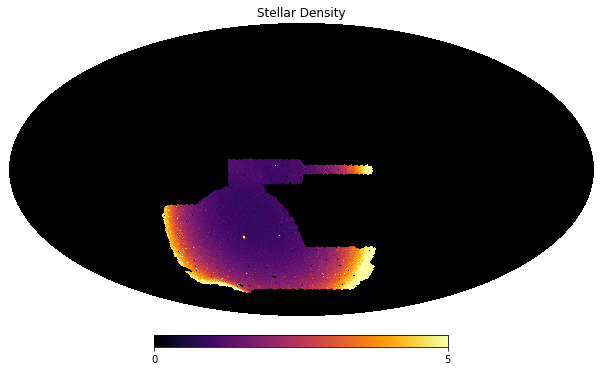

In [25]:
hp.mollview(condSigExt, nest=True, title="Stellar Density", min = 0, max = 5, badcolor = 'black', cmap = 'inferno', xsize = 10000)

In [26]:
# print(np.sum(validPixels))

In [27]:
# stelDensVal = np.copy(condSigExt)
# stelDensVal[~validPixels] = hp.UNSEEN

In [28]:
# hp.mollview(stelDensVal, nest=True, title="Stellar Density", max = 5, min = 0, badcolor = 'black', cmap = 'inferno')

In [29]:
# hp.mollview(validPixels, nest=True, title="Stellar Density", max = 1, min = 0, badcolor = 'black', cmap = 'inferno')